# Introduction

1. Here I'm testing DDPG on the continuous version of mountain car.

2. As per the suggestion at the paper below, I added parameter noise to the actor net to encourage
   exploration.
   
3. I also edited keras slightly to perform updates on custom gradients -- see the actor.py files for more details

4. As per other peoples experiences, getting the action exploration right was the hard part. I believe (must check more rigorously) that adding the parameter noise was the key. I found I needed large batchsizes (256 worked).




/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score, steps, T (mins)) = (10, -61.488519476929085, 999, 1.9366949160893758)
(episode, score, steps, T (mins)) = (20, -91.03761530101195, 999, 1.8559690515200298)
(episode, score, steps, T (mins)) = (30, 69.11760987733314, 341, 0.6366283853848775)
(episode, score, steps, T (mins)) = (40, 74.87048485523849, 302, 0.5628384987513224)
(episode, score, steps, T (mins)) = (50, 75.64414329548373, 289, 0.5373773018519084)
(episode, score, steps, T (mins)) = (60, 81.20718899732498, 208, 0.38992990255355836)
(episode, score, steps, T (mins)) = (70, 80.07442126249902, 213, 0.39578733444213865)
(episode, score, steps, T (mins)) = (80, 82.7979896526669, 189, 0.3498607834180196)
(episode, score, steps, T (mins)) = (90, 86.28481536800506, 146, 0.2708307147026062)
(episode, score, steps, T (mins)) =

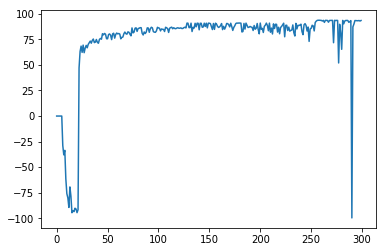

In [1]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
%matplotlib inline

#Environment
seed = 14
env = gym.make('MountainCarContinuous-v0')
env.seed(seed)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

#Agent
gamma, lr, tau = 0.99, 0.0001, 0.001
agent = Agent(num_states, num_actions, lr, gamma, seed_num = seed)
agent.memory_size = 10**4
agent.batchsize = 256
learning_start = 25*agent.batchsize
agent.tau = tau


#Train
EPISODES = 300
MAX_STEPS = 1000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    steps = 0
    t1 = time.time()
    
    while not done:
        #env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if len(agent.memory) > learning_start:
            agent.train_models()
        
        steps += 1
        if done or steps > MAX_STEPS:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    t2 = time.time()
    if e % 10 == 0:
        print '(episode, score, steps, T (mins)) = ' + str((e,reward_sum, steps, (t2-t1)/60.0))

#agent.save_target_weights()
plt.plot(scores)
#np.savetxt('stats/scores_inverted_pendulum.txt',scores)

### Watch a smart agent

In [10]:
env.reset()
done = False
while not done:
    #env.render()
    state = np.reshape(state, [1, num_states])  #reshape for keras
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    state = next_state
    #print 'position = ' + str( state[0] )
    if done:
        break
env.close()

### Record a smart agent

In [8]:
env = gym.make('MountainCarContinuous-v0')
env = gym.wrappers.Monitor(env, 'movies/', video_callable=lambda episode_id: True)
env.seed(seed)  # for comparison

state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    state = next_state
env.close()

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [11]:
env.close()